# Packages

In [1]:
%pip install pyarrow
%pip install ipywidgets
%pip install ipympl
%pip install tqdm
%matplotlib widget


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from tqdm import tqdm

# Load data

In [5]:
df_file = pd.read_parquet("../MGFarm_18650_Dataframes_ZHU/MGFarm_18650_Dataframes/MGFarm_18650_C01/df_SOH_scaled.parquet")
df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'] = pd.to_datetime(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'])
df_file

,Testtime[h],Absolute_Time[yyyy-mm-dd hh:mm:ss],Testtime[s],Step_ID,Schedule_Step_ID,Step_Time[s],Voltage[V],Current[A],Temperature[°C],Aux_U[V],...,EFC,SOC_c,SOC_m,Time_diff,SOC_ZHU,SOH_ZHU,Datetime,Scaled_Voltage[V],Scaled_Current[A],Scaled_Temperature[°C]
0,132.0,2023-02-06 02:12:05.500000000,4.757036e+05,93.000000,1.000000,1295.500000,3.293150,0.899276,26.700154,-0.001633,...,49.461844,0.180469,0.096826,0.000278,1.000000,0.999982,2020-01-01 00:00:00,0.751245,0.782378,0.629590
1,133.0,2023-02-06 03:03:41.500000000,4.787996e+05,93.000000,1.000000,4391.500000,3.408313,0.899212,26.795361,-0.001626,...,49.895792,0.614414,0.530774,0.000278,1.000000,0.999939,2020-01-01 01:00:00,0.899183,0.782360,0.665312
2,134.0,2023-02-06 04:03:41.909797376,4.823997e+05,94.090203,1.450180,2067.197502,3.311600,-0.315488,26.954510,-0.001625,...,50.524332,0.760767,0.663757,0.000278,0.778270,0.999889,2020-01-01 02:00:00,0.774946,0.424933,0.725027
3,135.0,2023-02-06 05:03:42.671848960,4.860004e+05,95.414214,1.414214,1601.918406,3.327415,-0.218411,26.842587,-0.001634,...,51.175751,0.828399,0.728467,0.000278,0.828556,0.999838,2020-01-01 03:00:00,0.795261,0.453498,0.683032
4,136.0,2023-02-06 06:03:42.473348096,4.896002e+05,97.026652,1.098834,1525.376041,3.387831,0.632536,26.749195,-0.001639,...,51.864978,0.777603,0.679183,0.000278,0.777815,0.999788,2020-01-01 04:00:00,0.872872,0.703890,0.647990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,4892.0,2023-09-16 03:08:43.500000000,1.761120e+07,1012.000000,60.000000,73179.500000,3.308960,-0.131697,26.780333,-0.001519,...,2798.316699,0.819698,-0.656477,0.000278,0.817519,0.922460,2020-07-17 08:00:00,0.771555,0.479013,0.659674
4761,4893.0,2023-09-16 04:08:43.500000000,1.761480e+07,1012.000000,60.000000,76779.500000,3.285993,-0.161505,26.784611,-0.001520,...,2798.401832,0.734565,-0.741611,0.000278,0.732466,0.922460,2020-07-17 09:00:00,0.742051,0.470242,0.661279
4762,4894.0,2023-09-16 05:08:43.500000000,1.761840e+07,1012.000000,60.000000,80379.500000,3.262852,-0.198477,26.769611,-0.001521,...,2798.492436,0.643961,-0.832215,0.000278,0.641949,0.922460,2020-07-17 10:00:00,0.712323,0.459363,0.655651
4763,4895.0,2023-09-16 06:08:43.499999744,1.762200e+07,1012.000000,60.000000,83979.500000,3.259289,-0.198057,26.778944,-0.001524,...,2798.634111,0.502287,-0.973889,0.000278,0.500409,0.922460,2020-07-17 11:00:00,0.707748,0.459487,0.659153


# Plot SOC SOH

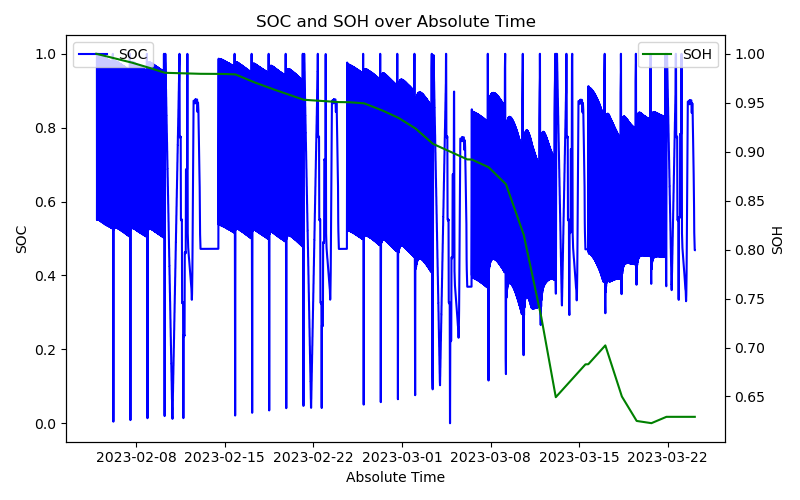

In [42]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel('Absolute Time')
ax1.set_ylabel('SOC')
ax1.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['SOC_ZHU'], color='blue', label='SOC')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('SOH')
ax2.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['SOH_ZHU'], color='green', label='SOH')
ax2.legend(loc='upper right')

plt.title("SOC and SOH over Absolute Time")
plt.xticks(rotation=45)
fig.tight_layout()  
plt.show()

## Calculation

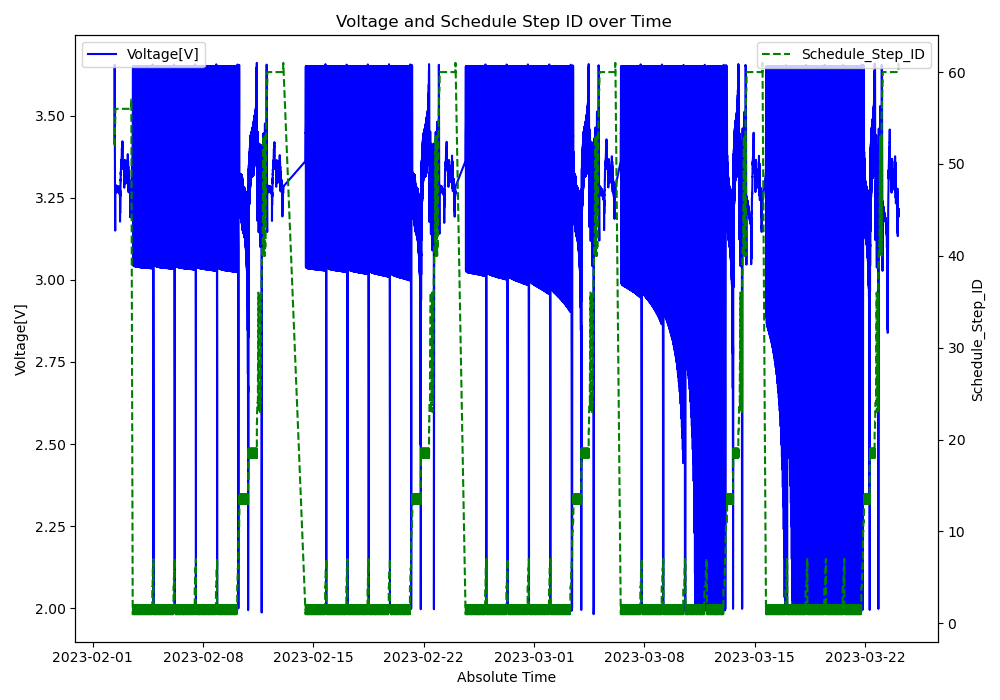

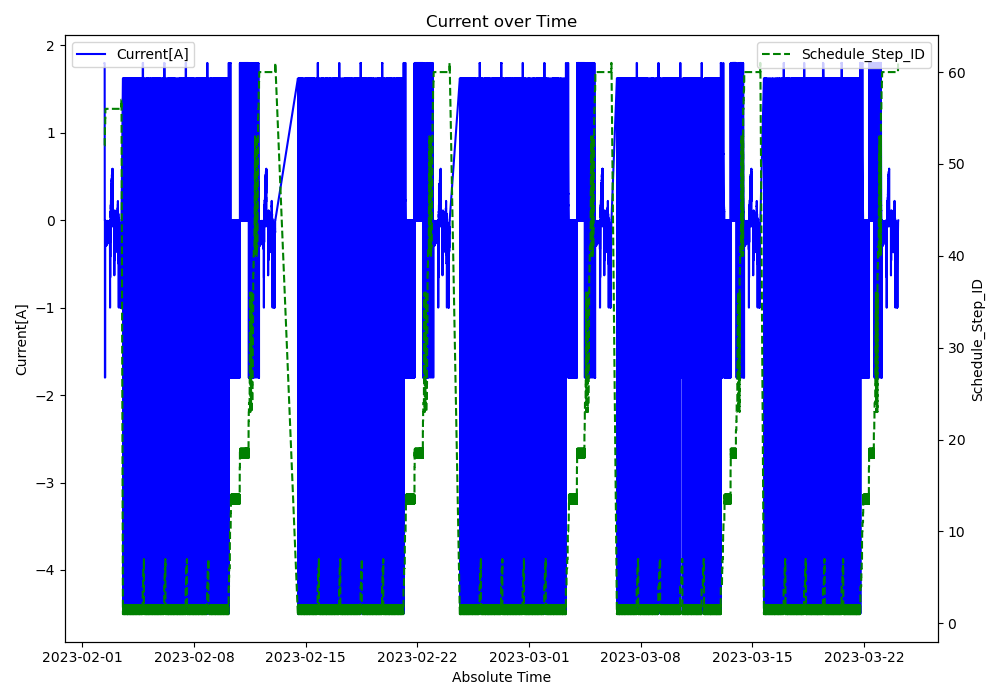

In [43]:
# Voltage
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('Absolute Time')
ax1.set_ylabel('Voltage[V]')
ax1.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['Voltage[V]'], color='blue', label='Voltage[V]')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Schedule_Step_ID')
ax2.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['Schedule_Step_ID'], color='green', label='Schedule_Step_ID', linestyle='--')
ax2.legend(loc='upper right')

plt.title(f'Voltage and Schedule Step ID over Time ')
plt.tight_layout()
plt.show()

# Current
fig2, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlabel('Absolute Time')
ax3.set_ylabel('Current[A]')
ax3.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['Current[A]'], color='blue', label='Current[A]')
ax3.legend(loc='upper left')

ax4 = ax3.twinx()
ax4.set_ylabel('Schedule_Step_ID')
ax4.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['Schedule_Step_ID'], color='green', label='Schedule_Step_ID', linestyle='--')
ax4.legend(loc='upper right')

plt.title(f'Current over Time')
plt.tight_layout()
plt.show()



### SOH SOC calculation
1. SOH 
- Start ID 1 End ID 7
- Compte original Capacity using fully discharge time

    $Capacity(Ah)=∫_{t0}^{t1}I(t)t$

- Compute current Capacity
- Compute SOH

    $ SOH = \frac{C_{\text{current}}}{C_{\text{initial}}}$

2. SOC
- Find the start of SOC(0) = 1
- Compute SOC
 
    $SOC(t) = SOC(0) + \frac{1}{C_{nom}} \int_0^t I(t)dt *100$ 

In [ ]:
# Set start and end time
start_time = df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'].min()
end_time = df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'].max()

filtered_data = df_file[
    (df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'] >= start_time) &
    (df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'] <= end_time)
]

# dt 
filtered_data['Time_diff'] = filtered_data['Testtime[s]'].diff() / 3600
filtered_data.loc[filtered_data['Time_diff'].abs() > 0.5, 'Time_diff'] = 0
filtered_data.fillna({'Time_diff':0}, inplace=True)

# Parameter initialize SOH
C_initial = None
C_current = 0
soh_values = []

# Parameter initialize SOC
C_nom = None
filtered_data['SOC_ZHU'] = np.nan
soc_start = filtered_data.loc[filtered_data['Schedule_Step_ID'] == 5,'Absolute_Time[yyyy-mm-dd hh:mm:ss]'].iloc[0]
soc_init = 1
soc_values = []
soc_t0 = soc_init
V_max = filtered_data['Voltage[V]'].max() 
V_min = filtered_data['Voltage[V]'].min() 

# Compute SOH during fully discharge state [5,8)
for idx, row in tqdm(filtered_data.iterrows(), total=len(filtered_data), desc="Processing data"):
    # Calculate SOH
    # Fully discharge phase
    if row['Schedule_Step_ID'] in range(5, 8):  
        C_current += row['Current[A]'] * row['Time_diff']
        
    elif C_current != 0:
        #Set first fully discharge state as Initial
        if C_initial is None: 
            C_initial = C_current     
            C_nom = abs(C_initial)    
        # Calculate SOH after fully discharge
        soh_values.append((idx, C_current / C_initial))
        C_current = 0
     
    if row['Absolute_Time[yyyy-mm-dd hh:mm:ss]'] >= soc_start and C_nom:
    # Calculate SOC
        delta_soc = (row['Current[A]'] * row['Time_diff']) / C_nom 
        soc_t = soc_t0 + delta_soc
        # Reset SOC after CV phase from every Capacity test 
        if row['Schedule_Step_ID'] == 5:
            soc_t = 1.0  # Fully charged during CV phase
        elif row['Voltage[V]'] >= V_max:
            soc_t = 1.0  # SOC at 1.0 if voltage is at maximum
        elif row['Voltage[V]'] <= V_min:
            soc_t = 0.0  # SOC if voltage is at minimum

        soc_t = max(0.0, min(soc_t, 1.0))
        soc_values.append((idx, soc_t))
        soc_t0 = soc_t 

print(f"Original capacity: {abs(C_initial)} Ah") 

for idx, soh_value in tqdm(soh_values, total=len(soh_values), desc="Updating SOH"):
    filtered_data.loc[idx, 'SOH_ZHU'] = soh_value
    
filtered_data['SOH_ZHU'] = filtered_data['SOH_ZHU'].interpolate(method='linear')    

for idx, soc_value in tqdm(soc_values, total=len(soc_values), desc="Updating SOC"):
    filtered_data.loc[idx, 'SOC_ZHU'] = soc_value

filtered_data.to_parquet('df_29.parquet',index = False)
filtered_data

Processing data: 100%|██████████| 11204023/11204023 [17:29<00:00, 10680.40it/s]


Original capacity: 1.788689533333232 Ah


Updating SOC: 100%|██████████| 10995369/10995369 [27:56<00:00, 6560.04it/s]


,Absolute_Time[yyyy-mm-dd hh:mm:ss],Testtime[s],Step_ID,Schedule_Step_ID,Step_Time[s],Voltage[V],Current[A],Temperature[°C],Aux_U[V],Aux_I[A],...,Q_sum,Capacity[Ah],SOH,Q_c,EFC,SOC_c,SOC_m,Time_diff,SOC_ZHU,SOH_ZHU
159774,2023-02-02 09:05:31,161285.1,592,52,0.0,3.4148,1.8002,26.2,-0.0006,NaN,...,10.291816,1.788751,0.999975,-0.603174,5.753487,0.662805,0.675211,0.000000,NaN,NaN
159775,2023-02-02 09:05:32,161286.1,592,52,1.0,3.4312,1.8009,26.2,0.0006,NaN,...,10.292316,1.788751,0.999975,-0.602673,5.753767,0.663084,0.675491,0.000278,NaN,NaN
159776,2023-02-02 09:05:33,161287.1,592,52,2.0,3.4443,1.8009,26.4,-0.0006,NaN,...,10.292816,1.788751,0.999975,-0.602173,5.754047,0.663364,0.675770,0.000278,NaN,NaN
159777,2023-02-02 09:05:34,161288.1,592,52,3.0,3.4539,1.8009,26.4,-0.0006,NaN,...,10.293316,1.788751,0.999975,-0.601673,5.754326,0.663644,0.676050,0.000278,NaN,NaN
159778,2023-02-02 09:05:35,161289.1,592,52,4.0,3.4613,1.8009,26.2,-0.0006,NaN,...,10.293817,1.788751,0.999975,-0.601173,5.754606,0.663923,0.676330,0.000278,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11363792,2023-07-02 11:44:39,11350129.8,762,61,896.0,3.2198,0.0000,26.7,-0.0006,NaN,...,5270.992221,1.170713,0.654470,-0.975037,2946.670224,0.454920,0.966047,0.000278,0.454888,0.654509
11363793,2023-07-02 11:44:40,11350130.8,762,61,897.0,3.2195,0.0000,26.6,0.0006,NaN,...,5270.992221,1.170713,0.654470,-0.975037,2946.670224,0.454920,0.966047,0.000278,0.454888,0.654509
11363794,2023-07-02 11:44:41,11350131.8,762,61,898.0,3.2198,0.0000,26.5,-0.0006,NaN,...,5270.992221,1.170713,0.654470,-0.975037,2946.670224,0.454920,0.966047,0.000278,0.454888,0.654509
11363795,2023-07-02 11:44:42,11350132.8,762,61,899.0,3.2198,0.0000,26.7,-0.0006,NaN,...,5270.992221,1.170713,0.654470,-0.975037,2946.670224,0.454920,0.966047,0.000278,0.454888,0.654509


In [ ]:
# Data filter
# First Plot -- Voltage and Schedule Step ID
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.set_xlabel('Absolute Time')
ax1.set_ylabel('SOH')
ax1.plot(filtered_data['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], filtered_data['SOH_ZHU'], color='blue', label='SOH')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Schedule_Step_ID')
ax2.plot(filtered_data['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], filtered_data['Schedule_Step_ID'], color='green', label='Schedule_Step_ID', linestyle='--')
ax2.legend(loc='upper right')

plt.title(f'Voltage and Schedule Step ID over Time')
plt.tight_layout()
plt.show()

# Second Plot -- Current
fig2, ax3 = plt.subplots(figsize=(10, 7))
ax3.set_xlabel('Absolute Time')
ax3.set_ylabel('SOC')
ax3.plot(filtered_data['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], filtered_data['SOC_ZHU'], color='blue', label='SOC')
ax3.legend(loc='upper left')

ax4 = ax3.twinx()
ax4.set_ylabel('Schedule_Step_ID')
ax4.plot(filtered_data['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], filtered_data['Schedule_Step_ID'], color='green', label='Schedule_Step_ID', linestyle='--')
ax4.legend(loc='upper right')

plt.title(f'Current over Time')
plt.tight_layout()
plt.show()

interactive(children=(Dropdown(description='Start ID:', options=(1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, …

<function __main__.soc_soh_plot(start_id, end_id, start_time, end_time)>

### Delta cycle calculation

In [48]:
cycle_capacity = 0
initial_capacity = None

df_file['Time_diff'] = df_file['Testtime[s]'].diff() / 3600
df_file.loc[df_file['Time_diff'].abs() > 0.5, 'Time_diff'] = 0
df_file.fillna({'Time_diff':0}, inplace=True)

df_file.reset_index(drop=True, inplace=True)

df_file['trend'] = np.nan

for idx, row in tqdm(df_file.iterrows(), total=len(df_file), desc="Calculating degradation trend"):
    if row['Schedule_Step_ID'] == 2:
        cycle_capacity += row['Current[A]'] * row['Time_diff']
    elif cycle_capacity != 0:
        if initial_capacity is None:
            initial_capacity = cycle_capacity
        if initial_capacity != 0:
            trend_value = 1 - abs(cycle_capacity / initial_capacity)
            df_file.at[idx, 'trend'] = trend_value
        cycle_capacity = 0
        
df_file['trend'].interpolate(method='linear', inplace=True)

Calculating degradation trend: 100%|██████████| 4073739/4073739 [03:21<00:00, 20172.33it/s]
C:\Users\zzhuqshun\AppData\Local\Temp\ipykernel_960\3690023578.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_file['trend'].interpolate(method='linear', inplace=True)


In [50]:
initial_capacity

-0.810110983333315

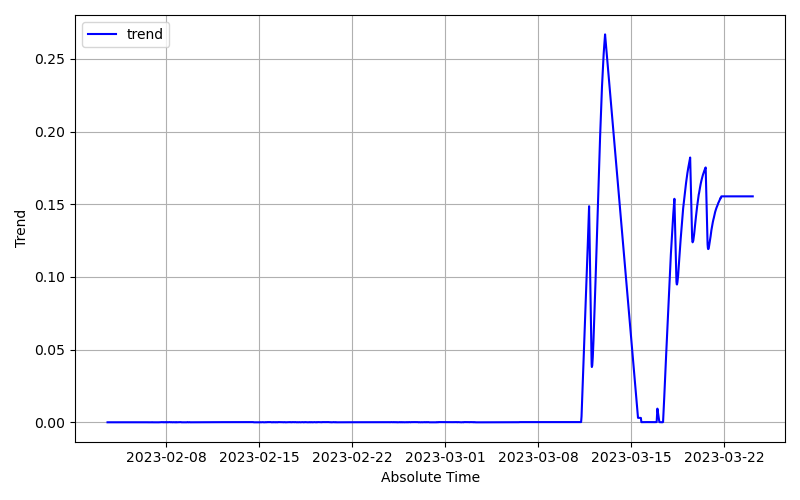

In [49]:
plt.figure(figsize=(8, 5))
plt.xlabel('Absolute Time')
plt.ylabel('Trend')
plt.plot(df_file['Absolute_Time[yyyy-mm-dd hh:mm:ss]'], df_file['trend'], color='blue', label='trend') 
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()